# TP2 PROCESAMIENTO DEL HABLA

**Esteban Matias Cancino**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [41]:
!pip install requests beautifulsoup4 html5lib
!pip install wordcloud
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 39.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [42]:
import requests                    # requests: hacer peticiones HTTP (descargar páginas, APIs)
from bs4 import BeautifulSoup      # BeautifulSoup: parsear HTML/XML (scrapear contenido de páginas)
import re                          # re: expresiones regulares para búsqueda y limpieza de texto
from wordcloud import WordCloud    # WordCloud: generar nubes de palabras a partir de texto
import spacy                       # spacy: biblioteca de NLP (tokenización, lematización, POS, etc.)
import matplotlib.pyplot as plt    # plt: visualización (gráficos), comúnmente usado con DataFrames y nubes de palabras

In [43]:
# URL de la pagina
url = "https://www.telemundo.com/shows/al-rojo-vivo/i-have-dream-o-yo-tengo-un-sueno-discurso-completo-de-martin-luther-king-en-espanol-tmna583241"
# -> Defino la URL que voy a solicitar.

respuesta = requests.get(url)
# -> Hago la petición HTTP GET a la URL usando requests y guardo la respuesta en 'respuesta'.

respuesta.raise_for_status()
# -> Lanzo una excepción si la respuesta HTTP no fue exitosa (status != 200). Así interrumpo el script en caso de error.

soup = BeautifulSoup(respuesta.text, "html5lib")
# -> Parseo el HTML con BeautifulSoup usando el parser 'html5lib' (más tolerante ante HTML "raro").
#    Accedo al contenido con el objeto 'soup'.

# En la página de Telemundo el texto principal aparece dentro de etiquetas <p> después del título.
    # Buscamos el contenedor principal del artículo y extraemos los párrafos visibles.
# -> Comentario explicativo sobre dónde espero encontrar el texto en esa página concreta.

parrafos = []
# -> Inicializo una lista vacía donde voy a acumular los párrafos relevantes.

# Intento localizar el elemento principal por role/article, o por el contenedor conocido.
for p in soup.find_all("p"):
    t = p.get_text(strip=True)
    # -> Itero sobre todas las etiquetas <p>, extraigo su texto y elimino espacios alrededor con strip=True.
    # Filtrar párrafos vacíos o de navegación
    if len(t) > 30: parrafos.append(t)
    # -> Si el párrafo tiene más de 30 caracteres lo considero relevante y lo agrego a 'parrafos'.
    #    (Umbral arbitrario para evitar menús, fechas o textos muy cortos).

texto = "\n\n".join(parrafos)
# -> Uno todos los párrafos con doble salto de línea para mantener separación entre párrafos.

with open("I have a dream.txt", "w", encoding="utf-8") as f: f.write(texto)
# -> Abro (o creo) el archivo "I have a dream.txt" en modo escritura con encoding UTF-8 y grabo el texto.
#    Uso 'with' para asegurar el cierre del archivo.

# veo el texto para verificar
print(texto)
# -> Imprimo el texto en consola para verificar el resultado rápidamente.

"I Have a Dream"- Traducción en EspañolTengo Un Sueñode Martin Luther King, Jr.(Discurso durante la Marcha en Washington por Trabajos y por la Libertad, 28 Agosto 1963 Washington, D.C.)"Estoy orgulloso de reunirme con ustedes hoy día en esta que será, en la historia, la más grande demostración para la libertad en la historia de nuestro País. Hace cien años, un gran Americano, en cuya simbólica sombra estamos hoy parados, firmó la Proclamación de la Emancipación. Este trascendental decreto vino como un gran rayo de luz de esperanza para millones de esclavos Negros, chamuscados en las llamas de una marchita injusticia. Vino como un lindo amanecer al final de una larga noche de cautiverio.

Pero cien años después, el Negro aún no es libre; cien años después, la vida del Negro aún es tristemente lisiada por las esposas de la segregación y las cadenas de la discriminación; cien años después, el Negro vive en una isla solitaria en medio de un inmenso océano de prosperidad material; cien años

In [44]:
texto_completo = texto[texto.find("Estoy orgulloso de reunirme con ustedes hoy día en esta que será,"):]
# -> Busco la frase de inicio en 'texto' y tomo desde allí hasta el final.

texto_completo = texto_completo[:texto_completo.find("A Division")]
# -> Busco la frase de fin en 'texto_completo' y recorto hasta justo antes de esa frase.

print(f"Número de palabras antes de la limpieza: {len(texto_completo.split())}")
# -> Cuento palabras usando split() (separa por espacios). Es rápido pero puede inflar/contar mal

print(f"longitud del texto antes de la limpieza {len(texto_completo)}")
# -> Imprimo la longitud en caracteres del texto recortado.

print(texto_completo)
# -> Muestro el fragmento resultante para verificar visualmente.

Número de palabras antes de la limpieza: 1596
longitud del texto antes de la limpieza 9469
Estoy orgulloso de reunirme con ustedes hoy día en esta que será, en la historia, la más grande demostración para la libertad en la historia de nuestro País. Hace cien años, un gran Americano, en cuya simbólica sombra estamos hoy parados, firmó la Proclamación de la Emancipación. Este trascendental decreto vino como un gran rayo de luz de esperanza para millones de esclavos Negros, chamuscados en las llamas de una marchita injusticia. Vino como un lindo amanecer al final de una larga noche de cautiverio.

Pero cien años después, el Negro aún no es libre; cien años después, la vida del Negro aún es tristemente lisiada por las esposas de la segregación y las cadenas de la discriminación; cien años después, el Negro vive en una isla solitaria en medio de un inmenso océano de prosperidad material; cien años después, el Negro todavía languidece en las esquinas de la sociedad Americana y se encuentra d

## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

In [45]:
# Mostrar stopwords que aparecen en el texto
nlp = spacy.load('es_core_news_sm')            # Cargo el modelo de spaCy para español (lo uso para tokenizar y reconocer stopwords)

stopwords = nlp(texto_completo)                # Proceso el texto completo con el pipeline 'nlp' y obtengo un objeto Doc
lista_stopwords = []                           # Inicializo una lista donde voy a guardar las palabras que spaCy marca como stopwords
for word in stopwords:                         # Itero cada token en el Doc
    if word.is_stop: lista_stopwords.append(word.text)  # Si el token tiene la bandera is_stop, lo añado a la lista (guardo su texto)
print(lista_stopwords)                         # Imprimo la lista completa de stopwords encontradas (puede contener duplicados y puntuación)

['Estoy', 'de', 'con', 'ustedes', 'hoy', 'día', 'en', 'esta', 'que', 'será', 'en', 'la', 'la', 'más', 'grande', 'para', 'la', 'en', 'la', 'de', 'nuestro', 'Hace', 'un', 'gran', 'en', 'estamos', 'hoy', 'la', 'de', 'la', 'Este', 'como', 'un', 'gran', 'de', 'de', 'para', 'de', 'en', 'las', 'de', 'una', 'como', 'un', 'al', 'final', 'de', 'una', 'de', 'Pero', 'después', 'el', 'aún', 'no', 'es', 'después', 'la', 'del', 'aún', 'es', 'por', 'las', 'de', 'la', 'y', 'las', 'de', 'la', 'después', 'el', 'en', 'una', 'en', 'medio', 'de', 'un', 'de', 'después', 'el', 'todavía', 'en', 'las', 'de', 'la', 'y', 'se', 'encuentra', 'en', 'su', 'propia', 'Entonces', 'hemos', 'hoy', 'día', 'aquí', 'a', 'una', 'En', 'un', 'hemos', 'a', 'la', 'de', 'nuestro', 'a', 'un', 'Cuando', 'los', 'de', 'nuestra', 'las', 'de', 'la', 'y', 'la', 'de', 'ellos', 'un', 'del', 'cual', 'cada', 'sería', 'el', 'Este', 'era', 'la', 'que', 'todo', 'sí', 'el', 'y', 'el', 'los', 'de', 'y', 'de', 'la', 'Es', 'hoy', 'día', 'que', 'ha'

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

In [46]:
texto_limpio = re.sub(r'<[^>]*>', '', texto_completo)
# -> Elimino cualquier etiqueta HTML residual (ej.: <tag ...>) dejando solo texto plano.

texto_limpio = re.sub(r'[^a-záéíóúüñ\s]', '', texto_limpio.lower())
# -> Paso todo a minúsculas y elimino cualquier carácter que no sea letra (a-z), vocales acentuadas,
#    la ñ, la ü o espacios. Así quito puntuación, números y signos. (Nota: esto también elimina apóstrofes y guiones.)

texto_limpio = re.sub(r'\s+', ' ', texto_limpio).strip()
# -> Normalizo los espacios: convierto múltiples saltos/espacios en uno solo y recorto espacios al inicio/fin.

texto_limpio = texto_limpio.split()
# -> Divido el texto en una lista de palabras separadas por espacios.

texto_limpio = [palabra for palabra in texto_limpio if palabra not in lista_stopwords]
# -> Filtro la lista excluyendo las palabras que aparecen en 'lista_stopwords'.
#    (Ojo: si 'lista_stopwords' tiene mayúsculas o duplicados, el filtro puede fallar o ser ineficiente.)

texto_limpio = ' '.join(texto_limpio)
# -> Uno las palabras filtradas en una cadena única separada por espacios para obtener el texto final limpio.

print(f"Número de palabras luego de la limpieza: {len(texto_limpio.split())}")
# -> Imprimo el número de palabras después de la limpieza (uso split() otra vez sobre la cadena final).

print(f"longitud del texto luego de la limpieza {len(texto_limpio)}")
# -> Imprimo la longitud (en caracteres) del texto limpio.

print(texto_limpio)
# -> Muestro el texto limpio resultante para inspección.

Número de palabras luego de la limpieza: 686
longitud del texto luego de la limpieza 5615
estoy orgulloso reunirme historia demostración libertad historia país hace cien años americano cuya simbólica sombra parados firmó proclamación emancipación trascendental decreto vino rayo luz esperanza millones esclavos negros chamuscados llamas marchita injusticia vino lindo amanecer larga noche cautiverio pero cien años negro libre cien años vida negro tristemente lisiada esposas segregación cadenas discriminación cien años negro vive isla solitaria inmenso océano prosperidad material cien años negro languidece esquinas sociedad americana desterrado tierra venido dramatizar condición vergonzosa sentido venido capital país cobrar cheque arquitectos república escribieron magníficas palabras constitución declaración independencia firmaban pagaré americano heredero pagaré promesa hombre hombre negro hombre blanco tendrían garantizados derechos inalienables vida libertad búsqueda felicidad obvio amé

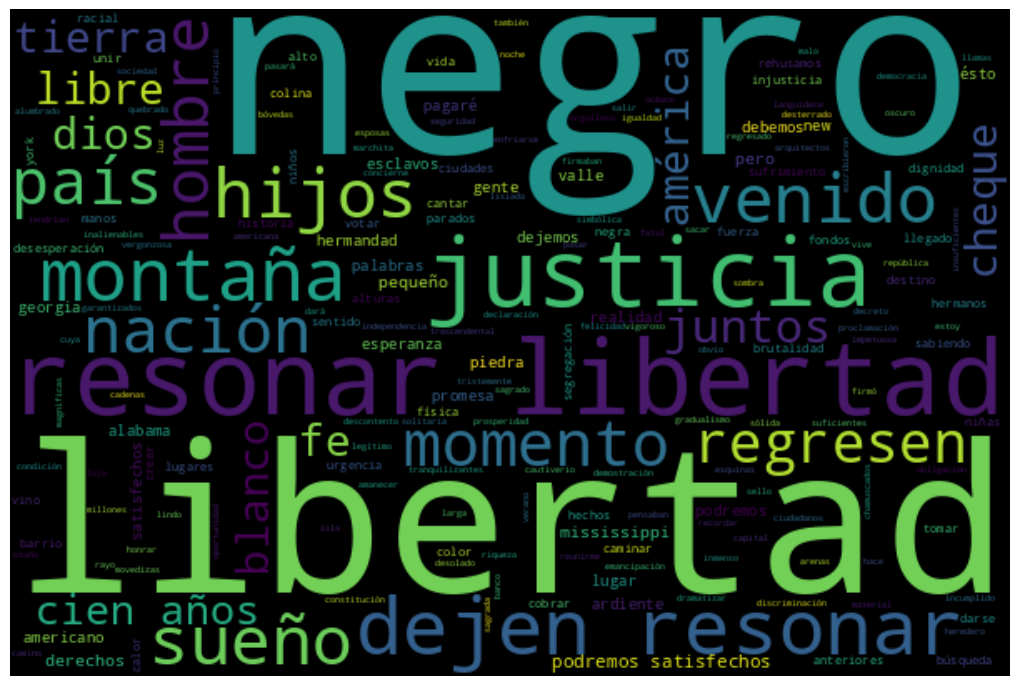

In [47]:
wordcloud = WordCloud(width=600, height=400, background_color="black").generate(texto_limpio)
# -> Genero la nube de palabras con WordCloud:
#    - le doy un ancho de 600 y alto de 400 píxeles,
#    - fondo negro,
#    - y uso .generate() pasándole el texto limpio (cadena con palabras separadas por espacios).

plt.figure(figsize=(10, 10), facecolor=None)
# -> Creo una figura de matplotlib de 10x10 pulgadas. No le asigno color de fondo extra (facecolor=None).

plt.imshow(wordcloud, interpolation='bilinear')
# -> Dibujo la imagen de la WordCloud en la figura.
#    Uso 'bilinear' para suavizar la visualización al escalar.

plt.axis("off")
# -> Apago ejes (sin ticks ni labels) para que la nube se vea limpia.

plt.tight_layout(pad=0)
# -> Ajusto el layout para eliminar márgenes innecesarios (pad=0 para minimizar espacios).

plt.show()
# -> Muestro la figura en pantalla (útil en notebooks interactivos).
#    En entornos headless (servidores) podría fallar; en esos casos guardo la imagen con wordcloud.to_file(...) o plt.savefig(...).

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
# -> Importo CountVectorizer para convertir texto en una matriz de frecuencias de tokens (BOW).

texto_completo = re.sub(r'[^\w\s\.\!\?]', '', texto_completo.lower())
# -> Paso el texto a minúsculas y elimino todo carácter que no sea "palabra", espacio o . ! ?

doc = nlp(texto_completo)
# -> Proceso el texto con spaCy para obtener un Doc (necesario para dividir en oraciones).

oraciones = [s.text for s in doc.sents]
# -> Extraigo una lista de oraciones usando la segmentación de spaCy (cada s es un Span).

oraciones_limpias = []
# -> Inicializo la lista donde voy a guardar las oraciones ya filtradas de stopwords.

for oracion in oraciones:
  filtro = [p for p in oracion.split() if p not in lista_stopwords]
  oraciones_limpias.append(' '.join(filtro))
# -> Para cada oración hago split por espacios y quito tokens que estén en 'lista_stopwords',
#    luego vuelvo a unir la oración filtrada.
# -> (Aviso: usar split() aquí puede dejar signos de puntuación pegados a las palabras,
#    por lo que 'y' != 'y,' y el stopword puede no coincidir. Además comparo con 'lista_stopwords'

vectorizador = CountVectorizer()
# -> Instancio CountVectorizer con parámetros por defecto (tokenización, lowercasing, n-gram=1).

vectorizador.fit(oraciones_limpias)
# -> Aprendo el vocabulario a partir de las oraciones limpias.

matriz = vectorizador.transform(oraciones_limpias)
# -> Transformo las oraciones en la matriz dispersa de conteos (n_oraciones x n_features).

print("Matriz shape:", matriz.shape)
# -> Imprimo la forma de la matriz: (n_oraciones, n_palabras_en_vocabulario)

print("Primeras 20 palabras del vocabulario:", vectorizador.get_feature_names_out()[:20])
# -> Muestro las primeras 20 entradas del vocabulario ordenadas alfabéticamente (según sklearn).

Matriz shape: (60, 441)
Primeras 20 palabras del vocabulario: ['1963' 'adelante' 'agua' 'ahora' 'alabama' 'aldea' 'alleghenies' 'alma'
 'alojarnos' 'alto' 'alturas' 'alumbrado' 'amanecer' 'amargura' 'amarrado'
 'americana' 'americano' 'amigos' 'américa' 'angostas']



#### 2.3.2 Determina la longitud de tu vocabulario.

In [49]:
print(f"Longitud del vocabulario: {len(vectorizador.get_feature_names_out())}")
# -> Imprimo la cantidad de palabras únicas que tiene mi vocabulario.
#    - Uso vectorizador.get_feature_names_out() para obtener la lista completa de términos.
#    - Aplico len(...) para contar cuántos elementos hay.
#    - Lo muestro con un f-string para que quede más claro el mensaje.

Longitud del vocabulario: 441



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
# -> Importo TfidfVectorizer para convertir mi corpus (oraciones_limpias) en una matriz TF-IDF.

# Crear un vectorizador TF-IDF
tf_idf_vectorizador = TfidfVectorizer()
# -> Instancio el vectorizador con parámetros por defecto.
#    (Por defecto hace lowercase=True y tokeniza usando su regex interna.)

# Ajustar el vectorizador al corpus
tf_idf_vectorizador.fit(oraciones_limpias)
# -> Aprendo el vocabulario del corpus (oraciones_limpias).

# Obtener la representación TF-IDF
tf_idf_matriz = tf_idf_vectorizador.transform(oraciones_limpias)
# -> Transformo las oraciones en la matriz dispersa TF-IDF: shape = (n_oraciones, n_términos)

# Mostrar información útil y pequeña muestra (no toda la matriz)
print("TF-IDF shape:", tf_idf_matriz.shape)
# -> Muestro la forma: (n_oraciones, n_términos)

print("tamaño del vocabulario:", len(tf_idf_vectorizador.get_feature_names_out()))
# -> Imprimo cuántas características/términos tengo en el vocabulario.

print("Primeras 20 palabras del vocabulario:", tf_idf_vectorizador.get_feature_names_out()[:20])
# -> Inspecciono las primeras 20 palabras del vocabulario (orden alfabético según sklearn).

TF-IDF shape: (60, 441)
tamaño del vocabulario: 441
Primeras 20 palabras del vocabulario: ['1963' 'adelante' 'agua' 'ahora' 'alabama' 'aldea' 'alleghenies' 'alma'
 'alojarnos' 'alto' 'alturas' 'alumbrado' 'amanecer' 'amargura' 'amarrado'
 'americana' 'americano' 'amigos' 'américa' 'angostas']


# Conclusiones

En este trabajo práctico, realicé web scraping para extraer el discurso "I Have a Dream" de Martin Luther King en español desde una página web, lo preprocesé eliminando stopwords y puntuación innecesaria, y lo dividí en oraciones. Luego, creé una matriz documento-vocabulario usando CountVectorizer, determiné que el vocabulario tiene 441 términos únicos, y apliqué TF-IDF para obtener una representación ponderada de los términos. Este proceso me permitió entender mejor las técnicas básicas de procesamiento de texto en NLP, como la limpieza de datos y la vectorización, que son fundamentales para análisis posteriores.